<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#GARCH-model" data-toc-modified-id="GARCH-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GARCH model</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-Datasets" data-toc-modified-id="Set-up-the-Datasets-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set up the Datasets</a></span></li><li><span><a href="#Visualisation-of-the-Data" data-toc-modified-id="Visualisation-of-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualisation of the Data</a></span></li><li><span><a href="#Visualisation-of-PACF" data-toc-modified-id="Visualisation-of-PACF-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualisation of PACF</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Rolling-Forecast-the-Origin" data-toc-modified-id="Rolling-Forecast-the-Origin-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rolling Forecast the Origin</a></span></li></ul></li></ul></div>

In [1]:
from arch import arch_model
from IPython.display import display, HTML
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import warnings
import pandas as pd

display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')

In [2]:
FTSE_volatility_df = pd.read_csv('../data/1.1-FTSE_VOL-PRICES_2006-2023.csv')

# GARCH model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

## Set up the Datasets

In [3]:
ticker = 'BARC'

sample_df = FTSE_volatility_df[FTSE_volatility_df.Ticker == ticker]
sample_df = sample_df[sample_df['V^YZ'].notnull()].reset_index(drop=True)
display(sample_df)

,Unnamed: 0,Month,Date,Asset,Currency,PermID,Ticker,RIC,Open,High,...,O_i,u_i,d_i,c_i,V^O,V^C,temp_RS,V^CC,V^RS,V^YZ
0,1934,2006-01-01,2006-01-10,8589934333,GBP,8589934333,BARC,BARC.L,5.631573,5.631573,...,-0.003190,0.000000,-0.013671,-0.011245,0.004509,0.008491,0.000033,0.012363,0.010122,0.010916
1,1935,2006-01-01,2006-01-11,8589934333,GBP,8589934333,BARC,BARC.L,5.618079,5.654063,...,0.008846,0.006385,-0.007232,0.003197,0.004501,0.007798,0.000096,0.011434,0.009964,0.010721
2,1936,2006-01-01,2006-01-12,8589934333,GBP,8589934333,BARC,BARC.L,5.636071,5.694546,...,0.000000,0.010322,-0.003197,0.003187,0.004501,0.007222,0.000094,0.010369,0.010724,0.011302
3,1937,2006-01-01,2006-01-13,8589934333,GBP,8589934333,BARC,BARC.L,5.645067,5.663059,...,-0.001592,0.003182,-0.013638,-0.010413,0.004844,0.007023,0.000087,0.011009,0.011386,0.011978
4,1938,2006-01-01,2006-01-16,8589934333,GBP,8589934333,BARC,BARC.L,5.586592,5.591090,...,0.000000,0.000805,-0.009709,-0.000805,0.004681,0.007145,0.000088,0.010929,0.008922,0.009904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,419657,2023-04-01,2023-04-24,8589934333,GBP,8589934333,BARC,BARC.L,1.523000,1.550299,...,-0.006153,0.017766,-0.001451,0.012398,0.007039,0.009089,0.000115,0.006436,0.012050,0.013684
4368,419658,2023-04-01,2023-04-25,8589934333,GBP,8589934333,BARC,BARC.L,1.535200,1.542400,...,-0.004419,0.004679,-0.017611,-0.013509,0.005085,0.010982,0.000157,0.009484,0.012111,0.013016
4369,419659,2023-04-01,2023-04-26,8589934333,GBP,8589934333,BARC,BARC.L,1.514600,1.544800,...,0.000000,0.019743,-0.011821,0.015722,0.005254,0.013388,0.000405,0.013101,0.014710,0.015477
4370,419660,2023-04-01,2023-04-27,8589934333,GBP,8589934333,BARC,BARC.L,1.562200,1.624746,...,0.015222,0.039257,-0.005263,0.036578,0.009229,0.018782,0.000325,0.027399,0.014964,0.018014


## Visualisation of the Data

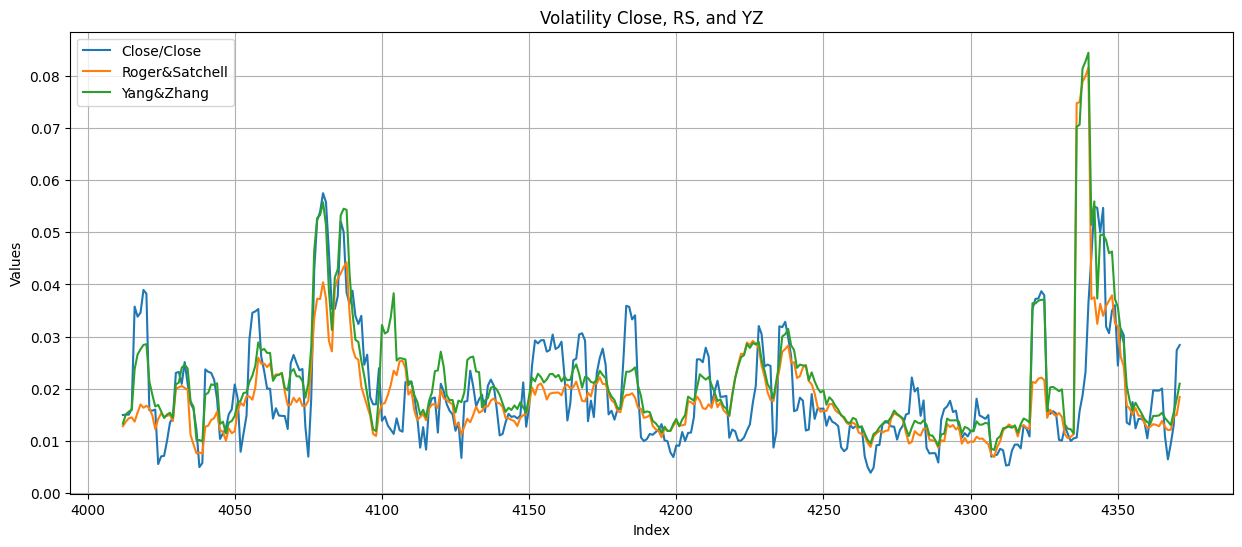

In [28]:
sample_5m = sample_df.iloc[-30*12:, :]

plt.figure(figsize=(15, 6))

# Plot each column
plt.plot(sample_5m['V^CC'], label='Close/Close')
plt.plot(sample_5m['V^RS'], label='Roger&Satchell')
plt.plot(sample_5m['V^YZ'], label='Yang&Zhang')

# Optionally, add grid
plt.grid(True)

# Add legend to distinguish each line
plt.legend()

# Add title and labels
plt.title('Volatility Close, RS, and YZ')
plt.xlabel('Index')
plt.ylabel('Values')

# Display the plot
plt.show()

## Visualisation of PACF

In [29]:
yz_series = sample_5m.iloc[:, -1]

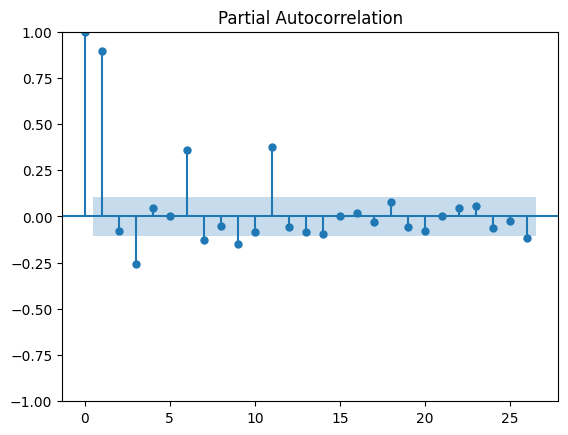

In [30]:
# Partial AutoCorrelation function is a method to see the direct correlation.
# between the past variables. On the parameter 3 it seems that the value kind-off.
# shut-off after param 2 thus that's the reason why choosing q,p = 2.

plot_pacf(yz_series)
plt.show()

In [31]:
test_size = int(len(yz_series)*0.2)

train, test = yz_series[:-test_size], yz_series[-test_size:]

In [32]:
model = arch_model(train, p=1, q=1)

In [33]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 32088232897.731705
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2099489453975.7024
Iteration:      3,   Func. Count:     31,   Neg. LLF: -1082.2017475936946
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1082.201749500194
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 3


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   V^YZ   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1082.20
Distribution:                  Normal   AIC:                          -2156.40
Method:            Maximum Likelihood   BIC:                          -2141.75
                                        No. Observations:                  288
Date:                Wed, Jul 05 2023   Df Residuals:                      287
Time:                        14:27:45   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0195  6.666e-04     29.227 8.888e-188 [1.817e-02,2.079e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.2945e-06  5.848e-09    221.380      0.000 [1.283e-06,1.306e-06]
alpha[1]       0.2000      0.190      1.052      0.293     [ -0.173,  0.573]
beta[1]        0.7800      0.133      5.873  4.268e-09     [  0.520,  1.040]
============================================================================

Covariance estimator: robust
"""

## Prediction

In [35]:
predictions = model_fit.forecast(horizon=test_size)

In [36]:
indices = yz_series[-test_size:].index
predictions = pd.Series(predictions.variance.values[-1, :], indices)

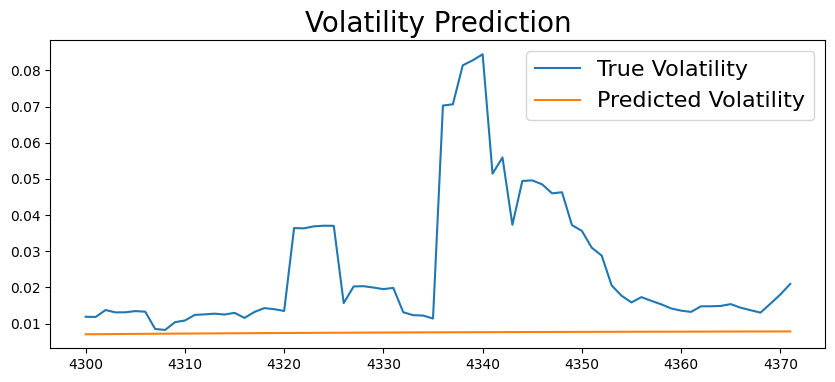

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(yz_series[-test_size:])
preds, = plt.plot(np.sqrt(predictions))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

## Rolling Forecast the Origin

In [38]:
rolling_predictions = []
for i in range(test_size):
    train = yz_series[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
indices = yz_series[-test_size:].index
rolling_predictions = pd.Series(rolling_predictions, indices)

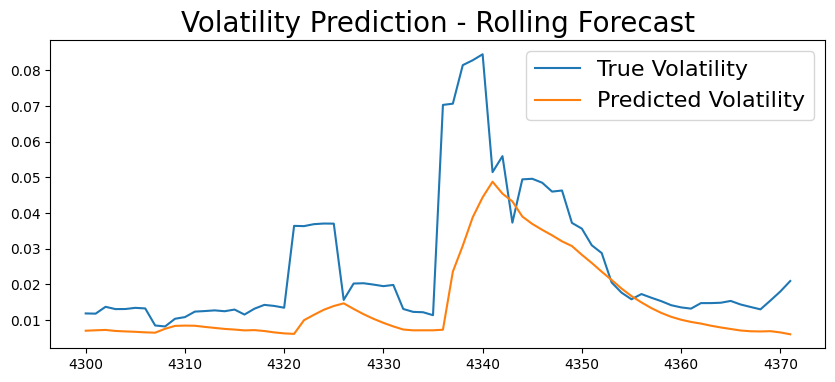

In [39]:
plt.figure(figsize=(10,4))
true, = plt.plot(yz_series[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [40]:
mse_million = mean_squared_error(yz_series[-test_size:],rolling_predictions)*10**6

In [51]:
GARCH_results = pd.DataFrame({
    'Model':'GARCH',
    'Test Size': test_size,
    'MSE^6':mse_million
             }
    , index=[0]
)
display(GARCH_results)

,Model,Test Size,MSE^6
0,GARCH,72,260.047223
